# Plot number of Genes
- aedavids@ucsc.edu
- 6/3/21

In [1]:
from   bme263DataVis.utilities import MatPlotLibUtilities
import matplotlib.pyplot as plt

mplu = MatPlotLibUtilities()
mplu.loadStyle() # load our custom matplotlib style settings

import numpy as np
import pandas as pd
from pathlib import Path
pd.set_option('display.max_colwidth', None)

import re

salmonIdx = 'gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx'

# load and clean salmon mapped counts

In [2]:
dataRoot = Path("../data")
mappedDay5Data = dataRoot.joinpath( 'numberOfUniqueGenesDay5SalmonMappedReads.tsv' )
mappedDay7Data = dataRoot.joinpath( 'numberOfUniqueGenesDay7SalmonMappedReads.tsv' )

In [3]:
rawMappedGeneCount_5DF = pd.read_csv(mappedDay5Data, sep="\t", header=1)
rawMappedGeneCount_5DF

,b_5_c_1,b_5_c_2,b_5_c_3,e_5_c_1,e_5_c_2,e_5_c_3,b_5_k_1,b_5_k_2,b_5_k_3,e_5_k_1,e_5_k_2,e_5_k_3
0,19813,19829,19825,13533,13797,13722,19820,19723,19752,16113,14336,14176


In [4]:
rawMappedGeneCount_7DF = pd.read_csv(mappedDay7Data, sep="\t", header=1)
rawMappedGeneCount_7DF

,b_7_c_1,b_7_c_2,b_7_c_3,b_7_k_1,b_7_k_2,b_7_k_3
0,21152,21124,20933,20826,20854,21131


In [5]:
def changeSampleIdFormat(df):
    colNames = df.columns.to_list()
    
    for i in range(len(colNames)):
        name = colNames[i]
        n1 = name.replace('b_', 'bulk/')
        n2 = n1.replace('e_', 'exo/')
        n3 = n2.replace('5_', '5/')
        n4 = n3.replace('c_', 'ctrl/')
        n5 = n4.replace('k_', 'kras/')
        n6 = n5.replace('7_', '7/')
        
        colNames[i] = n6
        
    retDF = df.copy(deep=True)
    retDF.columns = colNames   
    
    return( retDF)

In [6]:
sampleIdMappedGeneCount_5DF = changeSampleIdFormat(rawMappedGeneCount_5DF)
sampleIdMappedGeneCount_5DF

,bulk/5/ctrl/1,bulk/5/ctrl/2,bulk/5/ctrl/3,exo/5/ctrl/1,exo/5/ctrl/2,exo/5/ctrl/3,bulk/5/kras/1,bulk/5/kras/2,bulk/5/kras/3,exo/5/kras/1,exo/5/kras/2,exo/5/kras/3
0,19813,19829,19825,13533,13797,13722,19820,19723,19752,16113,14336,14176


In [7]:
sampleIdMappedGeneCount_7DF = changeSampleIdFormat(rawMappedGeneCount_7DF)
sampleIdMappedGeneCount_7DF

,bulk/7/ctrl/1,bulk/7/ctrl/2,bulk/7/ctrl/3,bulk/7/kras/1,bulk/7/kras/2,bulk/7/kras/3
0,21152,21124,20933,20826,20854,21131


In [8]:
def cleanUp(df):
    sampleId = df.columns.to_list()    
    numMappedUniqGenes = df.iloc[0, :].to_list()
    groupBySampleId = [ re.sub("/.$", "", name) for name in sampleId]
    
    dataDict = {"sampleId":sampleId, 
                'numMappedUniqGenes':numMappedUniqGenes,
                'groupBySampleId':groupBySampleId
               }
    retDF = pd.DataFrame( dataDict )
    
    return( retDF )

In [9]:
cleanMappedGeneCount_5DF = cleanUp(sampleIdMappedGeneCount_5DF)
cleanMappedGeneCount_5DF #.head(n=5)

,sampleId,numMappedUniqGenes,groupBySampleId
0,bulk/5/ctrl/1,19813,bulk/5/ctrl
1,bulk/5/ctrl/2,19829,bulk/5/ctrl
2,bulk/5/ctrl/3,19825,bulk/5/ctrl
3,exo/5/ctrl/1,13533,exo/5/ctrl
4,exo/5/ctrl/2,13797,exo/5/ctrl
5,exo/5/ctrl/3,13722,exo/5/ctrl
6,bulk/5/kras/1,19820,bulk/5/kras
7,bulk/5/kras/2,19723,bulk/5/kras
8,bulk/5/kras/3,19752,bulk/5/kras
9,exo/5/kras/1,16113,exo/5/kras


In [10]:
cleanMappedGeneCount_7DF = cleanUp(sampleIdMappedGeneCount_7DF)
cleanMappedGeneCount_7DF.head(n=5)

,sampleId,numMappedUniqGenes,groupBySampleId
0,bulk/7/ctrl/1,21152,bulk/7/ctrl
1,bulk/7/ctrl/2,21124,bulk/7/ctrl
2,bulk/7/ctrl/3,20933,bulk/7/ctrl
3,bulk/7/kras/1,20826,bulk/7/kras
4,bulk/7/kras/2,20854,bulk/7/kras


# Santity check 
use counts to make sure lables match box plots

In [11]:
mappedCountsDF = pd.concat([cleanMappedGeneCount_5DF, cleanMappedGeneCount_7DF])
mappedCountsDF

,sampleId,numMappedUniqGenes,groupBySampleId
0,bulk/5/ctrl/1,19813,bulk/5/ctrl
1,bulk/5/ctrl/2,19829,bulk/5/ctrl
2,bulk/5/ctrl/3,19825,bulk/5/ctrl
3,exo/5/ctrl/1,13533,exo/5/ctrl
4,exo/5/ctrl/2,13797,exo/5/ctrl
5,exo/5/ctrl/3,13722,exo/5/ctrl
6,bulk/5/kras/1,19820,bulk/5/kras
7,bulk/5/kras/2,19723,bulk/5/kras
8,bulk/5/kras/3,19752,bulk/5/kras
9,exo/5/kras/1,16113,exo/5/kras


In [12]:
def shortenSampleIds(df):
    df["sampleId"] = df["sampleId"].str.replace(".data/day.", "/", regex=True)
    df["sampleId"] = df["sampleId"].str.replace(".data/gen1c.day.", "/", regex=True)
    df["sampleId"] = df["sampleId"].str.replace(".exo.input.data", "", regex=True)
    df["sampleId"] = df["sampleId"].str.replace("\.", "/", regex=True)

# load and clean the unmapped counts

In [13]:
unmappedFile = "../data/uniqueUnMappedCounts.tsv"
rawUnmappedCountsDF = pd.read_csv(unmappedFile, sep="\t")
print(rawUnmappedCountsDF.head())
print()
print(rawUnmappedCountsDF.tail())

                 sampleId  numUnMappedUniqGenes  \
0  bulk.data/day.5/ctrl.1                  9577   
1  bulk.data/day.5/ctrl.2                  9925   
2  bulk.data/day.5/ctrl.3                  9911   
3  bulk.data/day.5/kras.1                  9466   
4  bulk.data/day.5/kras.2                  8232   

                                                                                                                                               htSeqCountFile  
0  /private/groups/kimlab/kras.ipsc/data/bulk.data/day.5/ctrl.1/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out  
1  /private/groups/kimlab/kras.ipsc/data/bulk.data/day.5/ctrl.2/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out  
2  /private/groups/kimlab/kras.ipsc/data/bulk.data/day.5/ctrl.3/htseqCount.out/STAR.gencode.v35.ucsc.rmsk.salmon.v1.3.0.sidx/unmapped/unmapped/htseqCount.out  
3  /private/groups/kimlab/kras.ipsc/data/bulk.data/da

In [14]:
# make sure all samples are for salmonIdx of interest
selectSalmonIdxRows = rawUnmappedCountsDF.loc[:, "htSeqCountFile"].str.contains(salmonIdx, regex=True)
# get ride file path. it is to long to print makes debug hard
unmappedCountsDF = rawUnmappedCountsDF.loc[selectSalmonIdxRows, ['sampleId', 'numUnMappedUniqGenes']]

print(unmappedCountsDF.shape)
print(unmappedCountsDF.head())

(18, 2)
                 sampleId  numUnMappedUniqGenes
0  bulk.data/day.5/ctrl.1                  9577
1  bulk.data/day.5/ctrl.2                  9925
2  bulk.data/day.5/ctrl.3                  9911
3  bulk.data/day.5/kras.1                  9466
4  bulk.data/day.5/kras.2                  8232


# Sanity check
use actual counts to make sure labels match box plots

In [15]:
shortenSampleIds(unmappedCountsDF)
#print(unmappedCountsDF.head(n=3))
print()
#print(unmappedCountsDF.tail(n=3))
print(unmappedCountsDF)


         sampleId  numUnMappedUniqGenes
0   bulk/5/ctrl/1                  9577
1   bulk/5/ctrl/2                  9925
2   bulk/5/ctrl/3                  9911
3   bulk/5/kras/1                  9466
4   bulk/5/kras/2                  8232
5   bulk/5/kras/3                  8572
6   bulk/7/ctrl/1                 11144
7   bulk/7/ctrl/2                 11137
8   bulk/7/ctrl/3                  8437
9   bulk/7/kras/1                  8087
10  bulk/7/kras/2                  8008
11  bulk/7/kras/3                 10808
12   exo/5/ctrl/1                 11584
13   exo/5/ctrl/2                  9549
14   exo/5/ctrl/3                 10734
15   exo/5/kras/1                 13986
16   exo/5/kras/2                 14092
17   exo/5/kras/3                 15008


In [16]:
# create key to group replicates
unmappedCountsDF["groupBySampleId"] = unmappedCountsDF.loc[:,"sampleId"].str.replace("/.$", "", regex=True)
unmappedCountsDF.loc[:,["sampleId", 'numUnMappedUniqGenes', 'groupBySampleId']]#.head()

,sampleId,numUnMappedUniqGenes,groupBySampleId
0,bulk/5/ctrl/1,9577,bulk/5/ctrl
1,bulk/5/ctrl/2,9925,bulk/5/ctrl
2,bulk/5/ctrl/3,9911,bulk/5/ctrl
3,bulk/5/kras/1,9466,bulk/5/kras
4,bulk/5/kras/2,8232,bulk/5/kras
5,bulk/5/kras/3,8572,bulk/5/kras
6,bulk/7/ctrl/1,11144,bulk/7/ctrl
7,bulk/7/ctrl/2,11137,bulk/7/ctrl
8,bulk/7/ctrl/3,8437,bulk/7/ctrl
9,bulk/7/kras/1,8087,bulk/7/kras


In [17]:
print(mappedCountsDF.shape)
print(unmappedCountsDF.shape)

(18, 3)
(18, 3)


In [18]:
mappedGroupedBy   = mappedCountsDF.groupby(["groupBySampleId"])
unmappedGroupedBy = unmappedCountsDF.groupby(["groupBySampleId"])

In [19]:
unmappedGroupedBy.get_group('bulk/5/ctrl')

,sampleId,numUnMappedUniqGenes,groupBySampleId
0,bulk/5/ctrl/1,9577,bulk/5/ctrl
1,bulk/5/ctrl/2,9925,bulk/5/ctrl
2,bulk/5/ctrl/3,9911,bulk/5/ctrl


In [20]:
mappedGroupedBy.head()

,sampleId,numMappedUniqGenes,groupBySampleId
0,bulk/5/ctrl/1,19813,bulk/5/ctrl
1,bulk/5/ctrl/2,19829,bulk/5/ctrl
2,bulk/5/ctrl/3,19825,bulk/5/ctrl
3,exo/5/ctrl/1,13533,exo/5/ctrl
4,exo/5/ctrl/2,13797,exo/5/ctrl
5,exo/5/ctrl/3,13722,exo/5/ctrl
6,bulk/5/kras/1,19820,bulk/5/kras
7,bulk/5/kras/2,19723,bulk/5/kras
8,bulk/5/kras/3,19752,bulk/5/kras
9,exo/5/kras/1,16113,exo/5/kras


In [21]:
unmappedGroupedBy.head()

,sampleId,numUnMappedUniqGenes,groupBySampleId
0,bulk/5/ctrl/1,9577,bulk/5/ctrl
1,bulk/5/ctrl/2,9925,bulk/5/ctrl
2,bulk/5/ctrl/3,9911,bulk/5/ctrl
3,bulk/5/kras/1,9466,bulk/5/kras
4,bulk/5/kras/2,8232,bulk/5/kras
5,bulk/5/kras/3,8572,bulk/5/kras
6,bulk/7/ctrl/1,11144,bulk/7/ctrl
7,bulk/7/ctrl/2,11137,bulk/7/ctrl
8,bulk/7/ctrl/3,8437,bulk/7/ctrl
9,bulk/7/kras/1,8087,bulk/7/kras


## Sanity check
calculate the mean of each group. We can use this determin is plots are correct

becarefult by default box plot show median not the mean

In [22]:
averages = mappedGroupedBy.mean()
sortedMappedByMean = averages.sort_values(by='numMappedUniqGenes')
print(sortedMappedByMean)   
 
print()

averages = unmappedGroupedBy.mean()
sortedUnmappedByMead = averages.sort_values(by='numUnMappedUniqGenes')
print(sortedUnmappedByMead)

                 numMappedUniqGenes
groupBySampleId                    
exo/5/ctrl             13684.000000
exo/5/kras             14875.000000
bulk/5/kras            19765.000000
bulk/5/ctrl            19822.333333
bulk/7/kras            20937.000000
bulk/7/ctrl            21069.666667

                 numUnMappedUniqGenes
groupBySampleId                      
bulk/5/kras               8756.666667
bulk/7/kras               8967.666667
bulk/5/ctrl               9804.333333
bulk/7/ctrl              10239.333333
exo/5/ctrl               10622.333333
exo/5/kras               14362.000000


# plot

In [23]:
def createPanel():
    figureWidthInInches = 8
    figureHeightInInches = 3
    fig = plt.figure(figsize=(figureWidthInInches,figureHeightInInches))
    panel = mplu.createPanelSameSizeAsFig(fig)
    return panel

def createFigureAndPanel(widthInInches=8, heightInInches=3):
    '''
    makes it possible to write model evaluation function that genertes
    multiple images with out having to save images to disk
    '''
    fig = plt.figure(figsize=(widthInInches, heightInInches))
    panel = mplu.createPanelSameSizeAsFig(fig)
    return (fig, panel)

In [24]:
def boxPlotSort( sampleId ):
    tokens = sampleId.split("/")
    condition = tokens[0]
    day = tokens[1]
    treatment = tokens[2]
    ret = day + "_" + treatment + "_" + condition
    return ret
        
keyList = pd.unique( mappedCountsDF["groupBySampleId"] ).tolist()
keyOrder = sorted(keyList, key=boxPlotSort)
keyOrder

['bulk/5/ctrl',
 'exo/5/ctrl',
 'bulk/5/kras',
 'exo/5/kras',
 'bulk/7/ctrl',
 'bulk/7/kras']

In [25]:
def getPlotData(mappedGroupedBy, unmappedGroupedBy, keyOrder):
    keys = []
    data = []
    for i in range(len(keyOrder)):
        key = keyOrder[i]
        gMDF = mappedGroupedBy.get_group(key)
        gUDF = unmappedGroupedBy.get_group(key)

        #print("\n********** key:{}".format(key))

        keys.append( "m_" + key)
        d = gMDF["numMappedUniqGenes"]
        data.append(d)
        #print("i:{} m:\n{}".format(i, d))

        keys.append("u_" + key)
        d = gUDF["numUnMappedUniqGenes"]
        data.append(d ) 
        #print("i:{} u:\n{}".format(i, d))

    #     print("\ni:{} keys:{}".format(i, keys))
    #     print("ni:{} data:\n{}\n".format(i, data))
    
    return (keys, data)

In [26]:
plotKeyLabels1, plotData1 = getPlotData(mappedGroupedBy, unmappedGroupedBy, keyOrder)
print(plotKeyLabels1[0])
print(plotData1[0])

m_bulk/5/ctrl
0    19813
1    19829
2    19825
Name: numMappedUniqGenes, dtype: int64


In [27]:
print("plotKeyLabels1:{}".format(plotKeyLabels1))

plotKeyLabels1:['m_bulk/5/ctrl', 'u_bulk/5/ctrl', 'm_exo/5/ctrl', 'u_exo/5/ctrl', 'm_bulk/5/kras', 'u_bulk/5/kras', 'm_exo/5/kras', 'u_exo/5/kras', 'm_bulk/7/ctrl', 'u_bulk/7/ctrl', 'm_bulk/7/kras', 'u_bulk/7/kras']


In [28]:
def geneCountBoxPlot( dataList, boxPlotKeyOrder, title) :
    '''
        arguments:
            dataList:
                a list of lists. There is a list for each groupByKey contain all the gene count values
                example
                [0    19813
                 1    19829
                 2    19825
                 Name: numMappedUniqGenes, dtype: int64,
                 0    9577
                 1    9925
                 2    9911
                 Name: numUnMappedUniqGenes, dtype: int64]
        
            boxPlotKeyOrder
                a list of groupby keys to plot
                ex. ['m_bulk/5/ctrl', 'u_bulk/5/ctrl', 'm_exo/5/ctrl','u_exo/5/ctrl']
        
            outFile:
                file path to save plot
                
        returns 
            (figure,panel)
    '''
    fig, panel = createFigureAndPanel(heightInInches = 8)
    panel.boxplot(dataList, vert=False)
    panel.set_yticklabels( boxPlotKeyOrder )
    
    # over lay the data points
    for i in range(len(boxPlotKeyOrder)):
        y = i + 1
        df = dataList[i]
        for x in df:
            #print("x:{} y:{}".format(x,y))
            panel.plot(x, y, linewidth=0, marker='o', alpha=1,
                       markersize=5, markeredgewidth=0, markerfacecolor='black')

    panel.set_xlabel("number of genes", fontsize=12 )
    panel.tick_params(axis='x', labelsize=12)
    panel.tick_params(axis='y', labelsize=12)

    panel.set_title( title )


#     str1 = "mapped counts produced using Salmon ref index {}".format(salmonIdx)
#     str2 = "\n unmapped counts produced using gen.38.p.13.v37.annotation.STAR.2.7.9a.index"
#     str3 = str1 + str2
#     props = dict(boxstyle='round', facecolor="white", alpha=0.5)
#     panel.text( 8000, 11, str3, fontsize=10, 
#                horizontalalignment='left', verticalalignment='center',
#                bbox=props, color="red" )

#     x = [np.min(data), np.max(data)]
#     y = [4.5, 4.5]
#     panel.plot(x,y, color="black", alpha=0.5, linestyle='--')
#     y = [8.5, 8.5]
#     panel.plot(x,y, color="black", alpha=0.5, linestyle='--')

    
    return( (fig, panel))

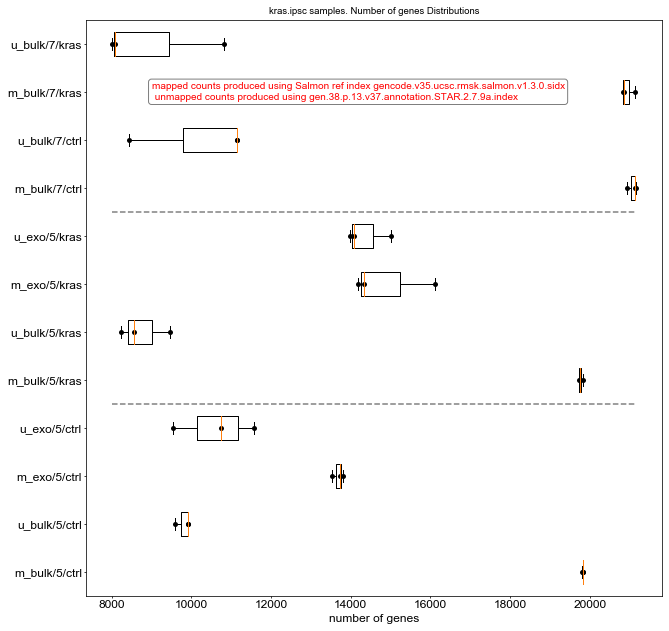

In [29]:
title = "kras.ipsc samples. Number of genes Distributions"
#fig1,panel1 = geneCountBoxPlot( data, keys, title) 
fig1,panel1 = geneCountBoxPlot( plotData1, plotKeyLabels1, title) 

# mark up plot
str1 = "mapped counts produced using Salmon ref index {}".format(salmonIdx)
str2 = "\n unmapped counts produced using gen.38.p.13.v37.annotation.STAR.2.7.9a.index"
str3 = str1 + str2
props = dict(boxstyle='round', facecolor="white", alpha=0.5)
panel1.text( 9000, 11, str3, fontsize=10, 
           horizontalalignment='left', verticalalignment='center',
           bbox=props, color="red" )

# add some horizontal lines to make it easier to see types of data
x = [np.min(plotData1), np.max(plotData1)]
y = [4.5, 4.5]
panel1.plot(x,y, color="black", alpha=0.5, linestyle='--')
y = [8.5, 8.5]
panel1.plot(x,y, color="black", alpha=0.5, linestyle='--')


# save
outFile1 = "img/geneCountDistributions1.png"
fig1.savefig(outFile1, dpi=300, bbox_inches='tight')  # BME163 style sheet should set dpi=600

# prevent bugs
fig1 = None
panel1 = None

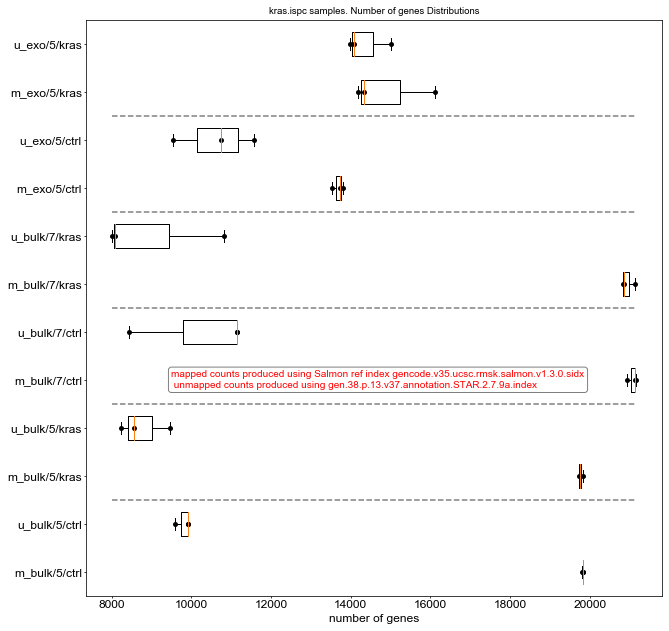

In [30]:
keymappedVsUnMapped = sorted(keyOrder)
plotKeyLabels2, plotData2 = getPlotData(mappedGroupedBy, unmappedGroupedBy, keymappedVsUnMapped)

title2 = "kras.ispc samples. Number of genes Distributions"
fig2,panel2 = geneCountBoxPlot( plotData2, plotKeyLabels2, title2 ) 

# mark up plot
str1 = "mapped counts produced using Salmon ref index {}".format(salmonIdx)
str2 = "\n unmapped counts produced using gen.38.p.13.v37.annotation.STAR.2.7.9a.index"
str3 = str1 + str2
props = dict(boxstyle='round', facecolor="white", alpha=0.5)
# panel2.text( 8000, 11, str3, fontsize=10, 
panel2.text( 9500, 5, str3, fontsize=10, 
           horizontalalignment='left', verticalalignment='center',
           bbox=props, color="red" )

# str4 = "ctrl always has more gene than kras"
# panel2.text( 12000, 1, str4, fontsize=10, 
#            horizontalalignment='left', verticalalignment='center',
#            bbox=props, color="red" )

# str5 = "aedwip exo's have more unmapped genes than bulk"
# panel2.text( 12000, 3, str5, fontsize=10, 
#            horizontalalignment='left', verticalalignment='center',
#            bbox=props, color="red" )

for j in [i + 0.5 for i in range(2,11, 2)]:
    # add some horizontal lines to make it easier to see library types
    x = [np.min(plotData2), np.max(plotData2)]
    y = [j, j]
    panel2.plot(x,y, color="black", alpha=0.5, linestyle='--')
   
# save
outFile2 = "img/geneCountDistributions2.png"
fig2.savefig(outFile2, dpi=300, bbox_inches='tight')  # BME163 style sheet should set dpi=600

# prevent bugs
fig2 = None
panel2 = None

In [31]:
#
# plot order by mean
#
def orderByMeanData(dataArg, keys) :
    m = np.mean(dataArg, axis=1).round(decimals=0).astype('int')
    r = zip(keys, m)
    lt = list(r)
#     s = sorted(lt, reverse=True, key=lambda t:t[1])
    s = sorted(lt, key=lambda t:t[1])
    keysSortedByMeanList = pd.DataFrame( pd.Series( dict(s) ) ).transpose().columns.to_list()
#     print(keysSortedByMeanList)
    data = []
    for key in keysSortedByMeanList:
        df = None
        #print("\n******")
        if key[0] == 'm':
            groupByKey = key.replace('m_', "")
            #print("key[0]:{} == m groupByKey: {}".format(key[0], groupByKey))        
            df = mappedGroupedBy.get_group( groupByKey )
            data.append( df["numMappedUniqGenes"] )

        else:
            #print("key[0]:{} == u groupByKey: {} ".format(key[0], groupByKey))
            groupByKey = key.replace('u_', "")        
            df = unmappedGroupedBy.get_group( groupByKey )
            data.append( df['numUnMappedUniqGenes'] )
            
    return( (keysSortedByMeanList, data, m))

keysSortedByMeanList, data3, average = orderByMeanData( plotData1, plotKeyLabels1 )
# print(keysSortedByMeanList)
# # print(data)
# print( average )

for i in range(len(keysSortedByMeanList)):
    print( "{}\t{}\t{}".format( keysSortedByMeanList[i], average[i], data3[i].to_list()) ) 

u_bulk/5/kras	19822	[9466, 8232, 8572]
u_bulk/7/kras	9804	[8087, 8008, 10808]
u_bulk/5/ctrl	13684	[9577, 9925, 9911]
u_bulk/7/ctrl	10622	[11144, 11137, 8437]
u_exo/5/ctrl	19765	[11584, 9549, 10734]
m_exo/5/ctrl	8757	[13533, 13797, 13722]
u_exo/5/kras	14875	[13986, 14092, 15008]
m_exo/5/kras	14362	[16113, 14336, 14176]
m_bulk/5/kras	21070	[19820, 19723, 19752]
m_bulk/5/ctrl	10239	[19813, 19829, 19825]
m_bulk/7/kras	20937	[20826, 20854, 21131]
m_bulk/7/ctrl	8968	[21152, 21124, 20933]


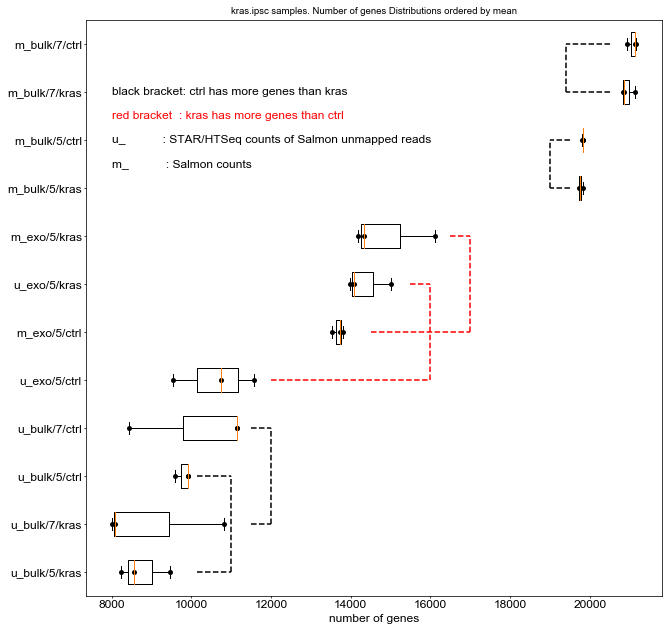

In [32]:
title3 = "kras.ipsc samples. Number of genes Distributions ordered by mean"
#fig3, panel3 = geneCountBoxPlot( data3, keysSortedByMeanList, title3 ) 
#plotKeyLabels, plotData = getPlotData(mappedGroupedBy, unmappedGroupedBy, keymappedVsUnMapped)

fig3, panel3 = geneCountBoxPlot( data3, keysSortedByMeanList, title3 ) 

def drawBracket(panel, bottomKey, topKey, xVertical, 
                xStartTop, xStartBottom, color):
# draw verticle bar
    yBottom = keysSortedByMeanList.index(bottomKey) + 1
    yTop = keysSortedByMeanList.index(topKey) + 1
    
    x = [xVertical, xVertical] 
    y = [yBottom, yTop]
    panel.plot(x, y, color=color,  linestyle='--')

    # draw top bracket
    x = [xStartTop, xVertical]
    y = [yTop, yTop]
    panel.plot(x, y, color=color,  linestyle='--')

    # draw bottom bracket
    x = [xStartBottom, xVertical]
    y = [yBottom, yBottom]
    panel.plot(x, y, color=color, linestyle='--')


drawBracket(panel3, 'm_bulk/7/kras',  'm_bulk/7/ctrl',  
            xVertical=19400, xStartTop=20500, xStartBottom=20500, color="black")
drawBracket(panel3, 'm_bulk/5/kras',  'm_bulk/5/ctrl',  
            xVertical=19000, xStartTop=19500, xStartBottom=19500, color="black")

# todo mark this
drawBracket(panel3, 'm_exo/5/ctrl',  'm_exo/5/kras',  
            xVertical=17000, xStartTop=16500, xStartBottom=14500, color="red")
drawBracket(panel3, 'u_exo/5/ctrl',  'u_exo/5/kras',  
            xVertical=16000, xStartTop=15500, xStartBottom=12000, color="red")

drawBracket(panel3, 'u_bulk/7/kras', 'u_bulk/7/ctrl', 
            xVertical=12000, xStartTop=11500, xStartBottom=11500, color="black")
drawBracket(panel3, 'u_bulk/5/kras', 'u_bulk/5/ctrl', 
            xVertical=11000, xStartTop=10150, xStartBottom=10150, color="black")


str1 = "black bracket: ctrl has more genes than kras"
str2 = "red bracket  : kras has more genes than ctrl"
str3 = "u_           : STAR/HTSeq counts of Salmon unmapped reads"
str4 = "m_           : Salmon counts"
#props = dict(boxstyle='round', facecolor="white", alpha=0.5)
panel3.text( 8000, 11, str1, fontsize=12, 
           horizontalalignment='left', verticalalignment='center',
           ) # bbox=props , color="red"

panel3.text( 8000, 11 - 0.5, str2, fontsize=12, 
           horizontalalignment='left', verticalalignment='center',
            color="red" ) # bbox=props,

panel3.text( 8000, 11 - 1, str3, fontsize=12, 
           horizontalalignment='left', verticalalignment='center',
             ) # bbox=props,

panel3.text( 8000, 11 - 1.5, str4, fontsize=12, 
           horizontalalignment='left', verticalalignment='center',
            ) # bbox=props,
   
# save
outFile3 = "img/geneCountDistributions3.png"
fig3.savefig(outFile3, dpi=300, bbox_inches='tight')  # BME163 style sheet should set dpi=600

# prevent bugs
fig3 = None
panel3 = None